### **Caso de uso: Ranking Billboard**

#### 1.- Librerías utilizadas

In [2]:
import pandas as pd #Manipulacion de datos
import numpy as np #Procesamiento de datos
#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.- Carga de datos

In [3]:
df = pd.read_csv('artists_billboard_fix3.csv',encoding = 'latin1')

In [4]:
df.head(3)

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0


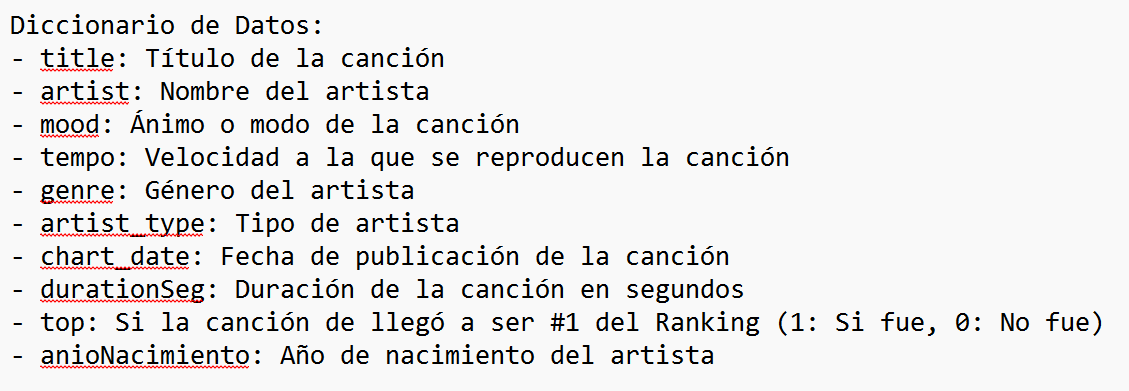

De acuerdo al contexto del caso de uso, se define que la variable Target es **Top**

#### 3.- Manipulación de datos

In [5]:
df.shape

(635, 11)

El conjunto de datos cuenta con 635 registros y 11 columnas

In [6]:
df.columns

Index(['id', 'title', 'artist', 'mood', 'tempo', 'genre', 'artist_type',
       'chart_date', 'durationSeg', 'top', 'anioNacimiento'],
      dtype='object')

#### 4.- Entendimiento de Datos

##### 4.1 General

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              635 non-null    int64  
 1   title           635 non-null    object 
 2   artist          635 non-null    object 
 3   mood            635 non-null    object 
 4   tempo           635 non-null    object 
 5   genre           635 non-null    object 
 6   artist_type     635 non-null    object 
 7   chart_date      635 non-null    int64  
 8   durationSeg     635 non-null    float64
 9   top             635 non-null    int64  
 10  anioNacimiento  635 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 54.7+ KB


Del conjunto de datos, contamos con 6 variables de texto y 5 variables numéricas (3 enteras y 2 continuas)

In [8]:
df.isna().sum()

,0
id,0
title,0
artist,0
mood,0
tempo,0
genre,0
artist_type,0
chart_date,0
durationSeg,0
top,0


**Hallazgo 1:**

*   El conjunto de datos no cuenta con valores nulos, por lo que se descarta realizar el gráfico de nulos (librería missingno)





,0
top,
0,494
1,141


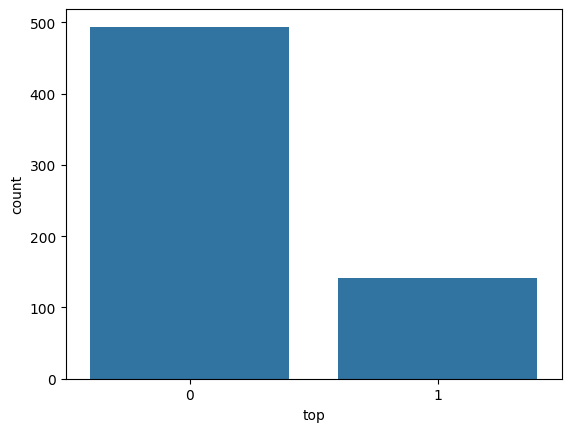

In [9]:
#Realizamos la distribución de la variables Target
sns.countplot(data = df, x = "top")
df.groupby('top').size()

In [10]:
141/635

0.2220472440944882

**Hallazgo 2:**

*   El 22% de canciones llegaron a convertise en Top 1 del Ranking Billboard



##### 4.2 Variables cuantitativas

In [11]:
#Calculamos las principales medidas estadísticas
df.describe()

,id,chart_date,durationSeg,top,anioNacimiento
count,635.000000,6.350000e+02,635.000000,635.000000,635.000000
mean,317.000000,2.013036e+07,321.768504,0.222047,1548.590551
std,183.452991,2.617996e+04,633.753787,0.415950,820.470454
min,0.000000,2.004021e+07,0.000000,0.000000,0.000000
25%,158.500000,2.014010e+07,200.000000,0.000000,1969.000000
50%,317.000000,2.014051e+07,232.000000,0.000000,1981.000000
75%,475.500000,2.014101e+07,266.500000,0.000000,1986.000000
max,634.000000,2.015031e+07,6840.000000,1.000000,1999.000000


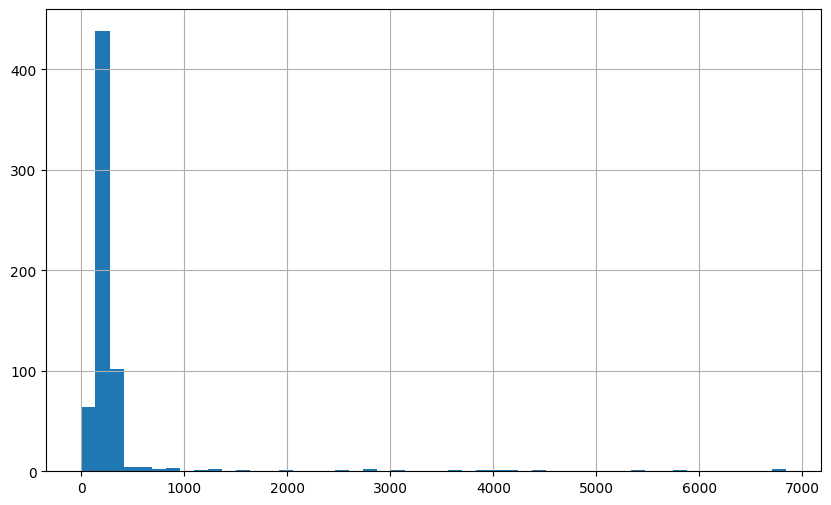

In [12]:
#Calculamos la distribción de las variables numéricas
df['durationSeg'].hist(bins = 50, figsize=(10,6))
plt.show()

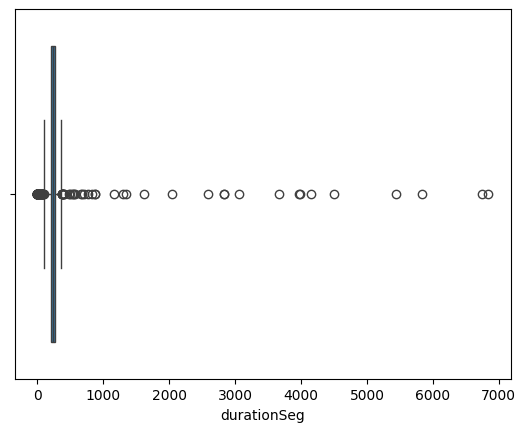

In [13]:
#Diagrama de Caja
sns.boxplot(data=df,x='durationSeg')
plt.show()

**Hallazgo 3:**

*  De las 5 variables numéricas, 4 de ellas no son analizables por ser correlativo (ID), fechas en formato de número (chart_date), top (target) y años de nacimiento (anioNacimiento).
*  De la variable **durationSeg**, observamos que la desviación es casi el doble del promedio por lo que después de revisar el diagrama de caja, se presenta valores atípicos.



<Axes: >

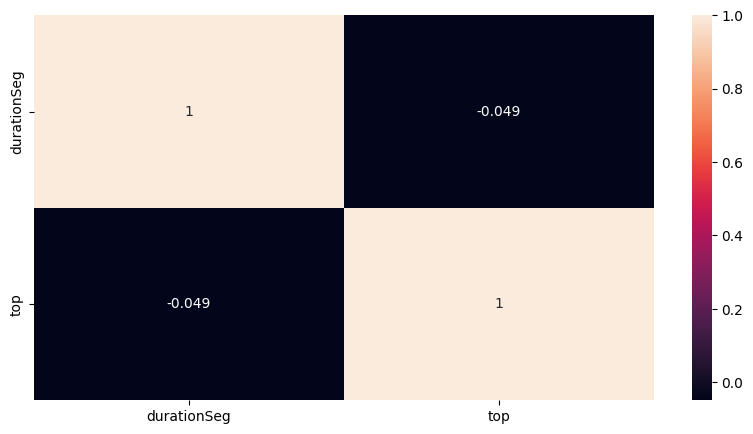

In [14]:
#Calculamos la correlación variables numéricas
corr = df[['durationSeg', 'top']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)

**Hallazgo 4:**

*   Observamos que la correlación de la variable Duración de segundos con el Target es casi nula (0.049)



##### 4.3 Variables cualitativas

In [15]:
categorical_attributes = df.select_dtypes(include=['object'])

In [16]:
categorical_attributes.dtypes

,0
title,object
artist,object
mood,object
tempo,object
genre,object
artist_type,object


**Hallazgo 5:**

*   De las 6 variables categóricas, 4 de ellas son analizables (mood, tempo, genre y artist type) debido a que las 2 variables restantes (title y artist) son textos amplios (comentarios)



In [17]:
#Mood
df[['mood','top']].groupby('mood').agg(['count','sum','mean']).sort_values(('top','count'), ascending = False)

top              
              count sum      mean
mood                             
Empowering       88  10  0.113636
Cool             78  27  0.346154
Energizing       71  33  0.464789
Yearning         68   6  0.088235
Defiant          64   5  0.078125
Excited          62  19  0.306452
Sensual          55  17  0.309091
Urgent           30   8  0.266667
Rowdy            15   3  0.200000
Sophisticated    15   4  0.266667
Brooding         14   3  0.214286
Upbeat           12   0  0.000000
Aggressive       11   3  0.272727
Melancholy       10   0  0.000000
Gritty            9   2  0.222222
Sentimental       7   0  0.000000
Romantic          7   0  0.000000
Fiery             6   1  0.166667
Easygoing         4   0  0.000000
Peaceful          4   0  0.000000
Lively            2   0  0.000000
Stirring          2   0  0.000000
Other             1   0  0.000000

**Hallazgo 6:**

* La variable presenta una gran dimensionalidad (+20 categorías) por lo que es necesario agruparlas para poder analizar su relación vs el target.



In [18]:
#tempo
df[['tempo','top']].groupby('tempo').agg(['count','sum','mean']).sort_values(('top','count'), ascending = False)

top               
             count  sum      mean
tempo                            
Medium Tempo   517  113  0.218569
Slow Tempo      65   16  0.246154
Fast Tempo      53   12  0.226415

**Hallazgo 7:**

* El velocidad de las canciones en su mayoría son de Medium Tempo (517 de 635 casos)
* La variable no tiene un cambio de comportamiento en el % de proporción del Target cuando se analiza por cada categoría

In [19]:
#genre
df[['genre','top']].groupby('genre').agg(['count','sum','mean']).sort_values(('top','count'), ascending = False)

top              
                   count sum      mean
genre                                 
Urban                215  71  0.330233
Pop                  188  60  0.319149
Traditional          113   1  0.008850
Alternative & Punk    60   5  0.083333
Electronica           27   2  0.074074
Rock                  13   0  0.000000
Other                 12   2  0.166667
Soundtrack             5   0  0.000000
Jazz                   2   0  0.000000

**Hallazgo 8:**

* La variable presenta una dimensionalidad alta (9 categorías) por lo que es necesario agruparlas
* La variable si tiene un cambio de comportamiento en el % de proporción del Target, especialmente en el género Urban y Pop con 33%  y 32% del total de canciones de cada categoría.

In [20]:
#artist_type
df[['artist_type','top']].groupby('artist_type').agg(['count','sum','mean']).sort_values(('top','count'), ascending = False)

top              
            count sum      mean
artist_type                    
Male          387  63  0.162791
Female        153  49  0.320261
Mixed          95  29  0.305263

**Hallazgo 9:**

* La variable si tiene un cambio de comportamiento en el % de proporción del Target, especialmente en el tipo de Artist Female y Mixed con 32%  y 30% del total de canciones de cada categoría.

#### 5.- Tratamiento de Datos

##### 5.1 Convertir variables categóricas a numéricas

In [21]:
# sex
df['artist_type_encoded'] = df['artist_type'].map( {'Male': 0, 'Mixed': 1, 'Female': 2} ).astype(int)

In [22]:
# genre
df['genre_encoded'] = df['genre'].map( {'Jazz': 0, 'Soundtrack': 0, 'Other': 0,
                                                    'Rock': 1, 'Electronica': 1, 'Alternative & Punk': 1,
                                                    'Traditional': 2, 'Pop': 3, 'Urban': 4
                                                    } ).astype(int)

##### 5.2 Aplicar un cambio de distribución de la variable numérica para reducir los outliers extremos

In [23]:
#Distribución de la variable por Deciles
df['durationSeg'].quantile(np.arange(0,1.01,0.1))

,durationSeg
0.0,0.0
0.1,133.8
0.2,190.0
0.3,206.2
0.4,220.0
0.5,232.0
0.6,241.0
0.7,255.8
0.8,277.0
0.9,321.6


In [24]:
#Distribución de la variable por Deciles
df['durationSeg'].quantile(np.arange(0.9,1.01,0.01))

,durationSeg
0.90,321.60
0.91,328.88
0.92,340.84
0.93,355.10
0.94,367.96
0.95,401.40
0.96,564.04
0.97,878.86
0.98,2216.32
0.99,3977.18


In [25]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.96))
    return(x)

In [26]:
df_tratamiento = df[['durationSeg']].apply(lambda x: outlier_capping(x))

In [27]:
df = pd.concat([df.drop(columns = ['durationSeg']),df_tratamiento],axis = 1)

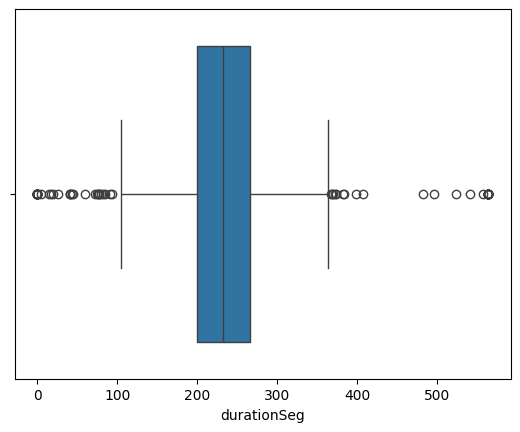

In [28]:
#durationSeg aplicando el topeo al percentil 97
sns.boxplot(data=df,x='durationSeg')
plt.show()

##### 5.3 Creación de variables numéricas

Visualizamos los años de nacimiento de los artistas

<Axes: ylabel='anioNacimiento'>

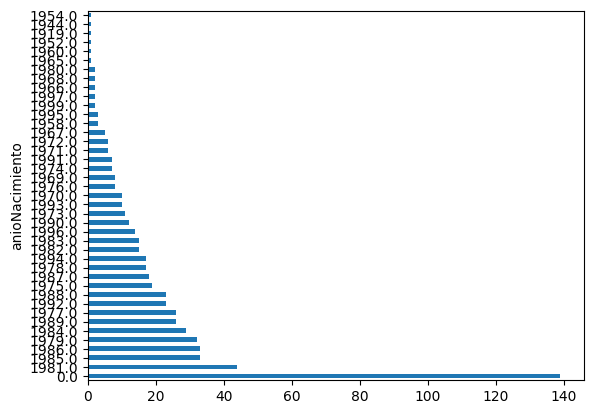

In [30]:
df['anioNacimiento'].value_counts().plot(kind='barh')

Calculamos promedio de edad y asignamos a los registros Nulos

In [31]:
def calcula_edad(anio,cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio==0.0:
        return None
    return int(momento) - anio

df['edad_en_billboard']=df.apply(lambda x: calcula_edad(x['anioNacimiento'],x['chart_date']), axis=1)

In [33]:
df.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,artist_type_encoded,genre_encoded,durationSeg,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.0,0,2,191.0,39.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.0,2,3,368.0,25.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.0,1,4,223.0,21.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.0,0,1,206.0,25.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,0.0,2,2,232.0,NaN


In [34]:
df['edad_en_billboard'].describe()

,edad_en_billboard
count,496.000000
mean,30.102823
std,8.400788
min,15.000000
25%,24.000000
50%,29.000000
75%,35.000000
max,95.000000


In [36]:
df['edad_en_billboard'].isnull().sum()

np.int64(139)

In [37]:
age_avg = df['edad_en_billboard'].mean()
age_std = df['edad_en_billboard'].std()
age_null_count = df['edad_en_billboard'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(df['edad_en_billboard'])

df.loc[np.isnan(df['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list

df['edad_en_billboard'] = df['edad_en_billboard'].astype(int)

print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 30.10282258064516
Desvió Std Edad: 8.40078832861513
Intervalo para asignar edad aleatoria: 21 a 38


<Axes: xlabel='edad_en_billboard', ylabel='count'>

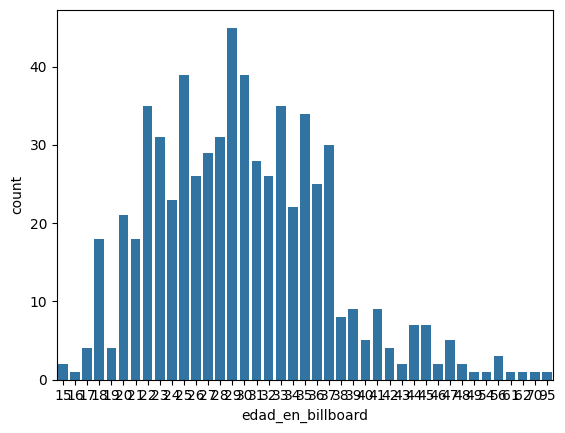

In [40]:
sns.countplot(x='edad_en_billboard',data=df)

##### 5.4 Selección de variables

In [41]:
df.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,artist_type_encoded,genre_encoded,durationSeg,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.0,0,2,191.0,39
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.0,2,3,368.0,25
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.0,1,4,223.0,21
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.0,0,1,206.0,25
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,0.0,2,2,232.0,24


In [42]:
df.columns

Index(['id', 'title', 'artist', 'mood', 'tempo', 'genre', 'artist_type',
       'chart_date', 'top', 'anioNacimiento', 'artist_type_encoded',
       'genre_encoded', 'durationSeg', 'edad_en_billboard'],
      dtype='object')

In [43]:
drop_elements = ['id', 'title', 'artist', 'mood', 'tempo', 'genre', 'artist_type',
       'chart_date','anioNacimiento']
df_encoded = df.drop(drop_elements, axis = 1)

In [44]:
df_encoded.head()

,top,artist_type_encoded,genre_encoded,durationSeg,edad_en_billboard
0,0,0,2,191.0,39
1,0,2,3,368.0,25
2,1,1,4,223.0,21
3,0,0,1,206.0,25
4,0,2,2,232.0,24


<Axes: >

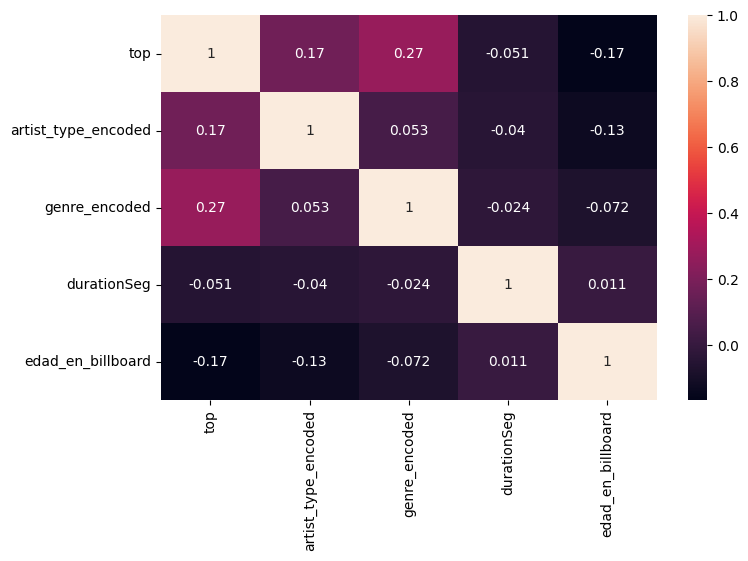

In [45]:
#Calculamos la correlación de variables numéricas para poder elegir las que se relacionan más con el Target.
corr = df_encoded.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True)

In [46]:
from sklearn.feature_selection import SelectKBest

#Variables independientes
X=df_encoded.drop(['top'], axis=1)
#Variable dependiente (Target)
y=df_encoded['top']

best=SelectKBest(k=3) #Coloca la cantidad de variables a tomar en cuenta
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['artist_type_encoded', 'genre_encoded', 'edad_en_billboard'], dtype='object')
